In [5]:

import math
import pickle
import matplotlib.pyplot as plt

In [6]:
# First, let's plot the loss per epoch. We are given a list of losses per batch 
# iteration so we must take the average of all the iterations in a given epoch.
data_size = 1000000    # Length of UDC train dataset
batch_size = 128       # Batch size used during training

loss_history = pickle.load(open('../dual_lstm_loss_history.pkl','rb'))

In [7]:
# Compute the number of batches per epoch
batches_per_epoch = math.ceil(data_size / batch_size)

# Reconstruct losses per epoch
losses_per_epoch = []
for start in range(0, len(loss_history), batches_per_epoch):
    sl = loss_history[start:start+batches_per_epoch]
    current_loss = sum(sl) / len(sl)
    losses_per_epoch.append(current_loss)

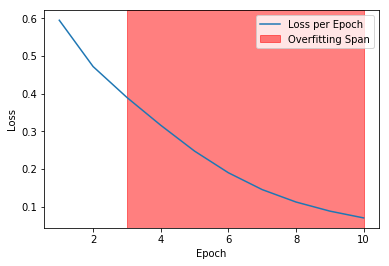

In [32]:
plt.plot(range(1, len(losses_per_epoch)+1), losses_per_epoch)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.axvspan(3, 10, alpha=0.5, color='red')
plt.legend(['Loss per Epoch', 'Overfitting Span'])
plt.show()